**ANALISE DE DADOS COM O PANDAS + INTEGRAÇAO PYTHON E EXCEL**

In [ ]:
#########################################################################################
#
# O que é PANDAS e para que serve 🚀
#
# O pandas é a ferramenta essencial para trabalhar com dados no Python, seja para explorar, limpar, organizar ou 
# preparar informações para análises e modelos.
#
# Com Pandas você pode:
#
# • Carregar dados de arquivos (CSV, Excel, SQL, JSON, etc.).
# • Explorar dados (ver quantas linhas tem, quais são as colunas, estatísticas rápidas).
# • Limpar dados (tratar valores ausentes, remover duplicados, converter tipos de dados).
# • Transformar dados (criar colunas, agrupar, ordenar, filtrar, combinar tabelas).
# • Analisar estatisticamente (médias, medianas, contagens, correlações, etc.).
# • Preparar dados para machine learning ou visualização.
#
# 🔹 Dica
# As vezes a leitura do arquivo pode apresentar erro por causa do enconding. Mas o que é enconding? 
# Encoding é a forma como os caracteres de texto são convertidos em números para o computador entender.
# O mais comum e recomendado é UTF-8, mas você pode encontrar outros como ASCII, Latin-1, Windows-1252, UTF-16.
#
# --Tenta abrir com UTF-8 (o mais comum)
#  df = pd.read_csv("dados.csv", encoding="utf-8")
#
#  --Se der erro ou aparecer caracteres estranhos, tenta outro:
#  df = pd.read_csv("dados.csv", encoding="latin-1")
#  df = pd.read_csv("dados.csv", encoding="windows-1252")
#
#
# DATAFRAME DO PANDAS
# O Dataframe é parecido com uma tabela. 
# • As colunas funcionam como chaves de dicionario 
# • As linhas funcionam como listas 
#
#########################################################################################


In [ ]:
#------------------------------------------------------------------------------------
# PANDAS E CSV 
# Quase sempre usaremos o pandas para ler um arquivo csv, é pratico e bem eficiente. 👌
#------------------------------------------------------------------------------------

import pandas as pd

vendas_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
vendas_df

In [ ]:
#------------------------------------------------------------------------------------
#  No pandas, o comando .info() é usado para exibir um resumo rápido do seu DataFrame.
#------------------------------------------------------------------------------------

vendas_df.info()

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 5.TRATAMENTO DE DADOS E MULTIPLAS BASES
#
# Comparando, tratando e mesclando Dataframes
# 
# 🎯 Objetivo: 
# • Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas analises 
# ficarem mais intuitivas. Para isso, vamos criar um data frame com todos os detalhes.
# • Usaremos o metodo merge para isso e, depois podemos pegar apenas as colunas que queremos 
# do dataframe final.
#
#------------------------------------------------------------------------------------

import pandas as pd
vendas_df = pd.read_csv('Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv('Contoso - Lojas.csv',sep=';')
clientes_df = pd.read_csv('Contoso - Clientes.csv', sep=';')

# usaremos o display para ver todos os dataframes

display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)



In [ ]:
#------------------------------------------------------------------------------------
#  Vamos tirar as colunas intuteis do cliente_df ou pegar apenas as colunas que quisermos
#------------------------------------------------------------------------------------

clientes_df = clientes_df[['ID Cliente','E-mail']]
produtos_df = produtos_df[['ID Produto','Nome do Produto']]
lojas_df = lojas_df[['ID Loja','Nome da Loja']]
display(produtos_df)

In [ ]:
#------------------------------------------------------------------------------------
#  Agora vamos juntar os dataframes para ter 1 único dataframe com tudo que precisamos
#------------------------------------------------------------------------------------

vendas_df = vendas_df.merge(produtos_df,on='ID Produto')
vendas_df = vendas_df.merge(lojas_df,on='ID Loja')
vendas_df = vendas_df.merge(clientes_df,on='ID Cliente')


# vamos renomear o e-mail para ficar claro que é do cliente
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})

# exibindo o dataframe final
display(vendas_df)

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 6. Análises e Visualização de Dados no pandas (Parte 1)
# 
# 🎯 Objetivo: 
# • Preparando as bases de dados e respondendo perguntas
#
#------------------------------------------------------------------------------------
import matplotlib

# Qual cliente que comprou mais vezes ❓
# 👉 Usaremos o metodo .value_counts() para contar quantas vezes cada valor do Dataframe aparece

frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)


In [ ]:
# 👉 Usaremos o metodo .plot() para exibir um grafico

# exibindo os cinco primeiros clientes
frequencia_clientes[:5].plot(figsize=(15,5), yticks=range(0,100,5))

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 7. Análises e Visualização de Dados no pandas (Parte 2)
# 
# 🎯 Objetivo: 
# • Preparando as bases de dados e respondendo perguntas
#
#------------------------------------------------------------------------------------

# Qual a loja que mais vendeu ❓

# 👉 Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as qtdes de vendas, por exemplo)

vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']] 
display(vendas_lojas)

In [ ]:
# 👉 ordenando o dataframe usando o metodo sort_values

vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
display(vendas_lojas)

In [ ]:
# 👉 podemos plotar em um grafico de barras

vendas_lojas[:5].plot(figsize=(15,5), kind='bar')

In [ ]:
# 👉 pegando o valor da maior e melhor loja diretamente

maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

In [ ]:
# Qual produto que menos vendeu  ❓

# 👉 Ja temos uma lista para isso, basta verificarmos o final da lista (ja que ela esta ordenada) ou entao usarmos os metodos: min() ou idxmin()

vendas_lojas[-1:]


In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 8. Filtrando um Dataframe
# 
#------------------------------------------------------------------------------------

# Qual o % das vendas que foi devolvido ❓

qtde_vendida = vendas_df['Quantidade Vendida'].sum()
qtde_devolvida = vendas_df['Quantidade Devolvida'].sum()
print('{:.2%}'.format(qtde_devolvida / qtde_vendida))


In [ ]:
# Agora se quisermos a mesma analise apenas para 1 loja. Queremos filtrasr apenas os itens da loja contoso europa online e saber o % de devolucao dessa loja

vendas_lojacontosoeuropeonline = vendas_df[vendas_df['ID Loja'] == 306]
display(vendas_lojacontosoeuropeonline)

qtde_vendida = vendas_lojacontosoeuropeonline['Quantidade Vendida'].sum()
qtde_devolvida = vendas_lojacontosoeuropeonline['Quantidade Devolvida'].sum()
print('{:.2%}'.format(qtde_devolvida / qtde_vendida))

In [ ]:
# Desafio: e se eu quisesse criar uma tabela apenas com as vendas da loja contoso europe online e que nao tiveram nenhuma devolucao.
# Quero criar essa tabela e saber quantas vendas sao

# tudo junto
df_loja306semdev = vendas_df[(vendas_df['ID Loja'] ==306) & (vendas_df['Quantidade Devolvida'] == 0)]
display(df_loja306semdev)


In [ ]:
# separado, filtrando o dataframe

loja306 = vendas_df['ID Loja'] == 306
qtde_devolvida_0 = vendas_df['Quantidade Devolvida'] == 0
df2_loja306semdev = vendas_df[loja306 & qtde_devolvida_0]
display(df2_loja306semdev)

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 9. Adicionando e Modificando Colunas DataFrame
# 
#------------------------------------------------------------------------------------

# verificando tipo da coluna 'data da venda'

vendas_df.info()

In [ ]:
# modificando a coluna 'Data da venda' atraves de to_datetime

vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format='%d/%m/%Y')
vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mes da Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['Dia da Venda'] = vendas_df['Data da Venda'].dt.day
#display(vendas_df)
vendas_df.info()

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 10. Modificando e Consultando Valores em DataFrame
# 
#------------------------------------------------------------------------------------

# E agora, caso a gente queira modificar 1 valor específico, como fazemos ❓ Vamos importar novamente a base de produtos

novo_produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
display(novo_produtos_df.head())

# o .head() mostra apenas os primeiros valores, é bem comum esse uso para ter uma visão do que são os dados


In [ ]:
# Antes de entrar no próximo exemplo, precisamos falar de 2 métodos: 🔍
# 👉 1. loc - permite pegar uma linha de acordo com o índice dela. Ele dá erro caso não encontre o índice. 
# Isso é interessante principalmente quando o índice é uma informação relevante ao invés só do número do índice ou 
# quando queremos pegar alguma linha específica do dataframe (ao invés de ir do início do dataframe até a linha 5, por exemplo).

# Também podemos usar como loc[índice_linha, índice_coluna] para acessar um valor específico e modificá-lo.
# 👉 2. iloc - enxerga o dataframe como linhas e colunas e consegue pegar o valor com um número de linha e um número de coluna.
# Observe que ele não analisa o valor do índice da linha e da coluna, apenas a posição importa.
# Uso: iloc[num_linha, num_coluna]

novo_produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
novo_produtos_df = novo_produtos_df.set_index('Nome do Produto')
display(novo_produtos_df.head()) # pega as primeiras linhas e .tail as ultimas



In [ ]:
# vamos pegar o preço produto Contoso Optical Wheel OEM PS/2 Mouse E60 Black
# por loc
print(novo_produtos_df.loc['Contoso Optical Wheel OEM PS/2 Mouse E60 Black','Preco Unitario'])

# por iloc
print(novo_produtos_df.iloc[2,5])

In [ ]:
# A empresa decidiu aumentar o preço do produto ID 873 (Contoso Wireless Laser Mouse E50 Grey) para 23 reais. 
# Como fazemos, para modificar isso na nossa base ❓

novo_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey','Preco Unitario'] = 23
display(novo_produtos_df.head())

In [ ]:
novo_produtos_df.loc[novo_produtos_df['ID Produto'] == 873, 'Preco Unitario'] = 23
display(novo_produtos_df.head())

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 11. Exportando para csv
# 
#------------------------------------------------------------------------------------

# Exportando do Dataframe para um csv
# No pandas, isso é bem simples: dataframe.to_csv('nome_do_arquivo.ext', sep=',')

vendas_df.to_csv('Novo Vendas 2017_apagar.csv', sep=';')

In [ ]:
# Criando um dicionario, transformando o dicionario em um dataframe e exportnado para csv

vendas_produtos = {'iphone': [558147, 951642], 'galaxy': [712350, 244295], 'ipad': [573823, 26964], 'tv': [405252, 787604], 'máquina de café': [718654, 867660], 'kindle': [531580, 78830], 'geladeira': [973139, 710331], 'adega': [892292, 646016], 'notebook dell': [422760, 694913], 'notebook hp': [154753, 539704], 'notebook asus': [887061, 324831], 'microsoft surface': [438508, 667179], 'webcam': [237467, 295633], 'caixa de som': [489705, 725316], 'microfone': [328311, 644622], 'câmera canon': [591120, 994303]}
vendas_produtos_df = pd.DataFrame.from_dict(vendas_produtos)
# a orientacao padrao é por colunas ou seja a chave vao ser colunas, se quiser que as chaves sejam os indices faça orient='index'
vendas_produtos_df = pd.DataFrame.from_dict(vendas_produtos, orient='index')
vendas_produtos_df = vendas_produtos_df.rename(columns={0: 'vendas 2019', 1: 'Vendas 2020'})
display(vendas_produtos_df)


In [ ]:
#exportnado para csv

vendas_produtos_df.to_csv('Novo Vendas Produtos_del.csv', sep=';')

In [ ]:
# Lendo um csv diretamente da internet
# caso 1: csv direto no link

import pandas as pd

url = 'https://drive.google.com/uc?authuser=0&id=1Ru7s-x3YJuStZK1mqr_qNqiHVvdHUN66&export=download'
cotacao_df = pd.read_csv(url)
display(cotacao_df)

In [ ]:
# Caso 2: csv em uma requisição que precisa ser tratada
# Histórico de preços do café no Google diretamente nesse site: https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp

import pandas as pd
import requests
import io

url = 'https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp?d-3496238-e=2&6578706f7274=1'
conteudo_url = requests.get(url).content
arquivo = io.StringIO(conteudo_url.decode('latin1'))
cafe_df = pd.read_csv(arquivo, sep=r'\t', engine='python')
display(cafe_df)

# Apenas para lembrar os tipos de encoding principais que vamos usar:
# encoding='latin1'; encoding='ISO-8859-1'; encoding='utf-8'; encoding='cp1252'


In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 13. Obs: Integração de Python com Excel - Pandas ou openpyxl
# 
# 👉 Duas formas mais utilizadas
#
#  1. Pandas
#  ➢ Mais usada no geral; ➢ Trata o Excel como uma base de dados; ➢ Faz o que quiser com o arquivo; ➢ Pode desfazer a estrutura original do arquivo, caso queira editar
#
#  2. Openpyxl
#  ➢ Trata o Excel como uma planilha mesmo que pode ter várias coisas; ➢ Edita "como se fosse um VBA";
#  ➢ Menos eficiente; ➢ Mantém mais a estrutura original do arquivo, mas cuidado porque não necessariamente tudo, então tem que testar
#
#------------------------------------------------------------------------------------

# 🎯 Desafio
# Temos uma planilha de produtos e serviços. Com o aumento de imposto sobre os serviços, temos que atualizar o preço dos produtos impactados pela mudança.

# Novo Multiplicador Imposto: 1.5
import pandas as pd

tabela = pd.read_excel('Produtos.xlsx')
display(tabela)


In [ ]:
# atualizar o multipicador
# sintaxe: tabela.loc[linha,coluna] = 1.5
tabela.loc[tabela['Tipo'] == 'Serviço','Multiplicador Imposto'] = 1.5

# fazer a conta do preco base reais
tabela['Preço Base Reais'] = tabela['Multiplicador Imposto'] * tabela['Preço Base Original']

tabela.to_excel('ProdutosPandas.xlsx', index=False)


In [ ]:
# OPENPYXL
from openpyxl import Workbook, load_workbook

planilha = load_workbook('Produtos.xlsx')
aba_ativa = planilha.active

for celula in aba_ativa['C']:
  if celula.value == 'Serviço':
    linha = celula.row
    aba_ativa[f'D{linha}'] = 1.5

planilha.save('Produtos_DELL.xlsx')

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 14. Criando uma barra de progresso em Python - tqdm
# 
# E quando o nosso código demora muito? Será que travou? Quanto tempo vai demorar?
# Biblioteca/Módulo tqdm
# Vamos importar os arquivos csv da Empresa Contoso e tratar como fizemos anteriormente
#
#------------------------------------------------------------------------------------

import pandas as pd

# importando os arquivos
vendas_df = pd.read_csv('Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv('Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv('Contoso - Clientes.csv', sep=';')

# limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

# mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)



In [ ]:
# Agora, imagina que a Loja Contoso Roma (ID 222), para tentar burlar o sistema de metas, diminuiu 1 da quantidade devolvida de todas as vendas que ela teve.
# Descobrindo isso, precisamos arrumar a base
from tqdm import tqdm

pbar = tqdm(total=len(vendas_df['ID Loja']), position=0, leave=True)

for i, id_loja in enumerate(vendas_df['ID Loja']):
  pbar.update()
  if id_loja == 222:
    vendas_df.loc[i,'Quantidade Devolvida'] += 1
display(vendas_df)

In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 15. Exercício Desafio pandas - Mini Projeto Análise de Dados
# 
#------------------------------------------------------------------------------------

# O que temos ❓

# Temos os dados de 2019 de uma empresa de prestação de serviços.
# CadastroFuncionarios
# CadastroClientes
# BaseServiçosPrestados

# Obs1: Para ler arquivos csv, temos o read_csv
# Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

# O que queremos saber/fazer ❓

# 1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa ❓
# Sugestão: Vamos calcular o salário total de cada funcionário, salário + benefícios + impostos, depois somar todos os salários
# 2. Qual foi o faturamento da empresa ❓
#  Sugestão: calcular o faturamento total de cada serviço e depois somar o faturamento de todos
#
# 3. Qual o % de funcionários que já fechou algum contrato ❓
#  Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
#  Na base de funcionários temos uma lista com todos os funcionários
#  Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
#  Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. 
#  Mas lembre-se, cada funcionário só pode ser contado uma única vez.
#  Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.
#  Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. 
#  Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA

# 4. Calcule o total de contratos que cada área da empresa já fechou
# 5. Calcule o total de funcionários por área
# 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
#    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()
#    Obs: Lembrando as opções mais usuais de encoding:
#    encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
#    Observação Importante: Se o código der um erro na hora de importar os arquivos:
#    - CadastroClientes.csv
#    - CadastroFuncionarios.csv

import pandas as pd

# 🔹 Dica: as vezes o codigo produz um erro porque no python o padrao é ponto e no csv por padrao separa as colunas por virgula, como tem virugla nos numeros acaba 
# gerando um erro. Para solucinoar usar o separador como ponto e virgula e o decimal como virgula

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv',sep=';', decimal=',')
display(funcionarios_df)


In [ ]:
#------------------------------------------------------------------------------------
# ☑️ 16. Exercício Desafio pandas - Importaçao e Tratamento de Dados
# 
#------------------------------------------------------------------------------------

# IMPORTACAO DE MODULOS E ARQUIVOS


import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv',sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv',sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

# retirar colunas Estado Civil e Cargo da tabela de funcionarios
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)  # axis igual a 1 se refere a coluna


display(funcionarios_df)
display(clientes_df)
display(servicos_df)

In [72]:
# 1-FOLHA SALARIAL

funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('Total da folha salarial é de R${:,}'.format(funcionarios_df['Salario Total'].sum()))


Total da folha salarial é de R$2,717,493.22


In [73]:
# 2-FATURAMENTO DA EMPRESA

faturamento_df = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on='ID Cliente')
faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
print('Faturamento Total: R${:,}'.format(sum(faturamento_df['Faturamento Total'])))


Faturamento Total: R$5,519,160


In [ ]:
# 3- % FUNCIONARIOS FECHARAM CONTRATO

Qtde_Funcionarios_FecharamContrato = len(servicos_df['ID Funcionário'].unique())
Qtde_funcionarios_total = len(funcionarios_df['ID Funcionário'])
print('Percentual Funcionarios fecharam Contrato: {:.2%}'.format(Qtde_Funcionarios_FecharamContrato / Qtde_funcionarios_total))



Percentual Funcionarios fecharam Contrato: 86.84%


In [ ]:
# 4-QTDE CONTRATOS POR AREA

contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()
print(contratos_area_qtde)


Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

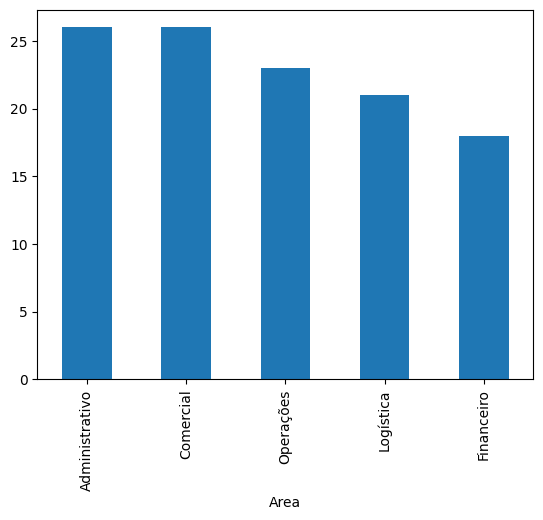

In [ ]:
# 5-FUNCIONARIOS POR AREA

funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.plot(kind='bar')



In [ ]:
# 6-TICKET MEDIO MENSAL

ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket Medio Mensal: R${:,.2f}'.format(ticket_medio))

Ticket Medio Mensal: R$2,502.56
